In [56]:
# Homework 4_1
# ข้อมูล
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score
from sklearn.model_selection import GridSearchCV
import joblib



In [57]:
# df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')
file_path = "../../data/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)
df.drop(columns=['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude'], inplace=True)
df.head()

,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [58]:
# Look if there are any duplicate rows in the dataset
df.loc[df.duplicated()]

,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation


In [59]:
# Check for null values
df.isna().sum()

fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

In [60]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']


In [61]:
#Removal of outlier:
df1 = df.copy()

for i in numerical_list:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
# display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))
df = df1.copy()
df.head()


Inference:
Before removal of outliers, The dataset had 32065 samples.
After removal of outliers, The dataset now has 25245 samples.


,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [62]:
# Label encoding

label_encoder = LabelEncoder()
df['risk_classification'] = label_encoder.fit_transform(df['risk_classification'])

In [63]:
# target class are highly imbalanced
df['risk_classification'].value_counts()

risk_classification
0    20451
2     4277
1      517
Name: count, dtype: int64

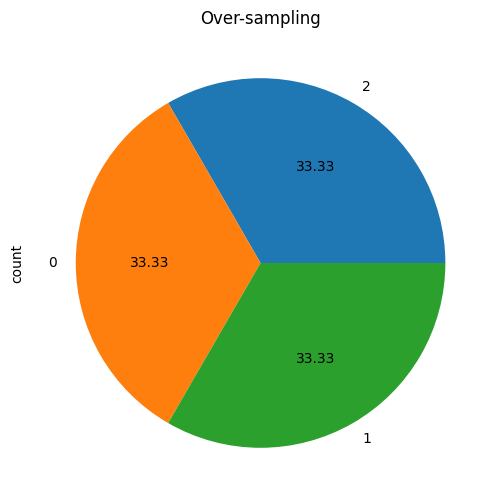

In [64]:
# solve imbalnce class

#Random Oversampling
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(sampling_strategy="not majority") # String
# X = df.drop(['risk_classification'], axis=1)
# Y = df['risk_classification']
# X, Y = ros.fit_resample(X, Y)

# ------------------------------------------------------------

# Apply SMOTE (Synthetic Minority Over-sampling)
from imblearn.over_sampling import SMOTE
X = df.drop(columns=["risk_classification"])  # Features
Y = df["risk_classification"]  # Target
smote = SMOTE(sampling_strategy="auto", random_state=42)
X, Y = smote.fit_resample(X, Y)

ax = Y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [65]:
# after solve imbalnce class
Y.value_counts()

risk_classification
2    20451
0    20451
1    20451
Name: count, dtype: int64

In [66]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

#  Select Features Using Information Gain For Classification In ML

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.0357044 , 0.03280816, 0.0264211 , 0.0236504 , 0.0288015 ,
       0.02966194, 0.03861242, 0.02840366, 0.03514334, 0.02091132,
       0.03120255, 0.03494964, 0.04906587, 0.03277772, 0.03740614,
       0.02845756, 0.0259958 , 0.03713889, 0.03534096, 1.09861532,
       0.03249849, 0.03816256])

In [67]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

disruption_likelihood_score        1.098615
historical_demand                  0.049066
order_fulfillment_status           0.038612
delivery_time_deviation            0.038163
cargo_condition_status             0.037406
driver_behavior_score              0.037139
fuel_consumption_rate              0.035704
fatigue_monitoring_score           0.035341
port_congestion_level              0.035143
lead_time_days                     0.034950
eta_variation_hours                0.032808
iot_temperature                    0.032778
delay_probability                  0.032498
supplier_reliability_score         0.031203
handling_equipment_availability    0.029662
loading_unloading_time             0.028802
route_risk_level                   0.028458
weather_condition_severity         0.028404
traffic_congestion_level           0.026421
customs_clearance_time             0.025996
warehouse_inventory_level          0.023650
shipping_costs                     0.020911
dtype: float64

<Axes: >

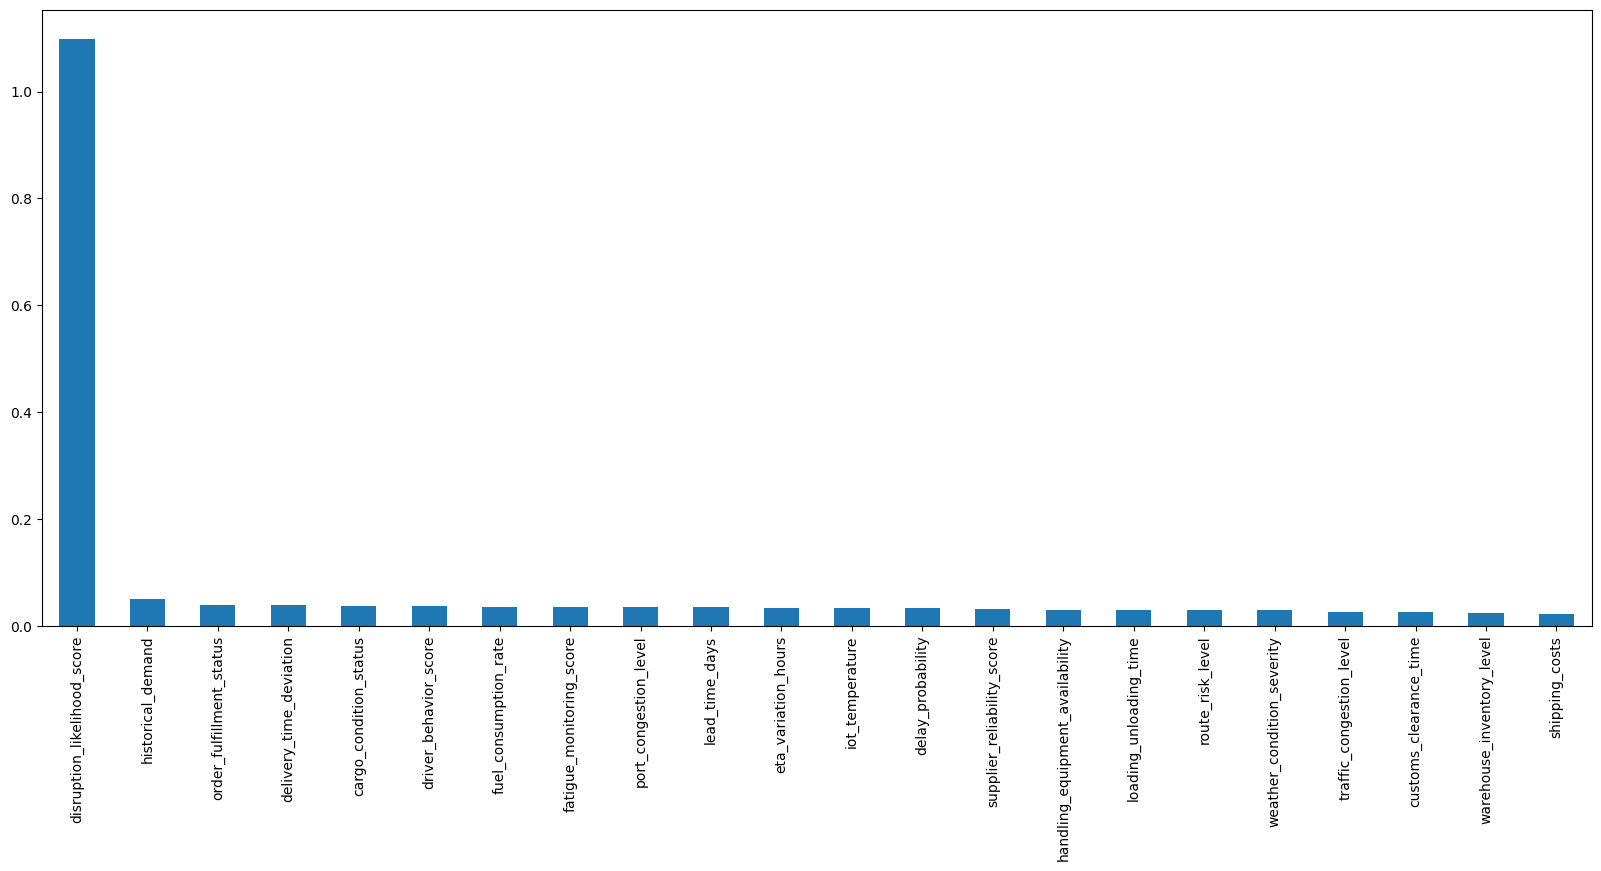

In [68]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [69]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
selected_feature = X_train.columns[sel_five_cols.get_support()]
print(f"Top 5 Feature: {selected_feature}")

Top 5 Feature: Index(['order_fulfillment_status', 'historical_demand',
       'cargo_condition_status', 'disruption_likelihood_score',
       'delivery_time_deviation'],
      dtype='object')


In [70]:
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]

X_train

,order_fulfillment_status,historical_demand,cargo_condition_status,disruption_likelihood_score,delivery_time_deviation
24481,0.882777,7205.246476,0.035134,1.000000,2.348545
58434,0.247370,7995.285807,0.594477,0.562096,8.768822
22492,0.756477,9932.483769,0.477842,0.776728,9.828261
39689,0.318124,9957.979009,0.194927,0.268893,7.516259
2888,0.916517,2104.904816,0.722561,0.999998,1.697481
...,...,...,...,...,...
54343,0.461909,9966.174332,0.076690,0.487871,6.648762
38158,0.930660,4601.759031,0.754161,0.292436,-0.352302
860,0.632656,8251.035573,0.217659,0.953890,3.389473
15795,0.853349,9967.005582,0.937680,0.999965,9.107156


In [71]:
# Transform data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)

[[0.88277692 0.71770158 0.03513418 0.9999999  0.36237853]
 [0.24736903 0.79750356 0.59447666 0.42515965 0.89740183]
 [0.7564762  0.99318018 0.47784152 0.70690859 0.98568843]
 ...
 [0.6326551  0.82333687 0.21765886 0.9394711  0.4491226 ]
 [0.85334865 0.99666723 0.93767998 0.99995409 0.9255963 ]
 [0.6650766  0.73330631 0.01289791 0.14487667 0.67038991]]


In [83]:
class LogisticRegressionScratchSoftmax:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.W = None  # Weights (matrix)
        self.b = None  # Bias (vector)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability improvement
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def initialize_weights(self, n_features, n_classes):
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

    def cost_function(self, probs, y_one_hot):
        m = y_one_hot.shape[0]
        return -np.sum(y_one_hot * np.log(probs + 1e-8)) / m

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1)  # Ensure y is a 1D array
        m, n_features = X.shape
        n_classes = len(np.unique(y))  # Number of unique classes

        # Convert y to one-hot encoding
        y_one_hot = np.eye(n_classes)[y]

        self.initialize_weights(n_features, n_classes)

        for i in range(self.num_iterations):
            # Compute logits (Z) and apply softmax
            z = np.dot(X, self.W) + self.b
            probs = self.softmax(z)

            # Compute loss
            loss = self.cost_function(probs, y_one_hot)

            # Compute gradients
            gradient_W = (1 / m) * np.dot(X.T, (probs - y_one_hot))
            gradient_b = (1 / m) * np.sum(probs - y_one_hot, axis=0, keepdims=True)

            # Update weights and biases
            self.W -= self.learning_rate * gradient_W
            self.b -= self.learning_rate * gradient_b

            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {loss}")

    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        probs = self.softmax(z)
        return np.argmax(probs, axis=1)  # Return class with highest probability


In [85]:
logisticRegression = LogisticRegressionScratchSoftmax(learning_rate=1e-1, num_iterations=10000)

# train model
logisticRegression.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(logisticRegression, 'model_logistic_regression.joblib')

Iteration 0, Cost: 1.0986122586681104
Iteration 100, Cost: 0.8228392242907371
Iteration 200, Cost: 0.6954459506234256
Iteration 300, Cost: 0.6211460769131548
Iteration 400, Cost: 0.570754060735982
Iteration 500, Cost: 0.5331864227599977
Iteration 600, Cost: 0.5034075935528309
Iteration 700, Cost: 0.478800816297914
Iteration 800, Cost: 0.45786301255564804
Iteration 900, Cost: 0.4396618407961899
Iteration 1000, Cost: 0.42358280442860496
Iteration 1100, Cost: 0.4092005468125291
Iteration 1200, Cost: 0.3962085316332984
Iteration 1300, Cost: 0.38437832267396244
Iteration 1400, Cost: 0.3735348284029166
Iteration 1500, Cost: 0.36354061544144195
Iteration 1600, Cost: 0.35428560597962694
Iteration 1700, Cost: 0.34568009570040337
Iteration 1800, Cost: 0.33764988912506216
Iteration 1900, Cost: 0.33013282570960745
Iteration 2000, Cost: 0.32307624385757727
Iteration 2100, Cost: 0.31643509267889175
Iteration 2200, Cost: 0.31017050082710407
Iteration 2300, Cost: 0.3042486742417894
Iteration 2400, Cos

['model_logistic_regression.joblib']

In [86]:
# load model to use for evaluation
path_to_model = './model_logistic_regression.joblib'
model_logistic_regression_loaded = joblib.load(path_to_model)
y_pred = model_logistic_regression_loaded.predict(X_test_scaled)

In [87]:
# Begin Evaluation (classification)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Classification Report
print("classification report : ")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred )
print("Confusion Matrix : ")
print(cm)

classification report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5011
           1       0.94      1.00      0.97      5181
           2       0.98      0.94      0.96      5147

    accuracy                           0.97     15339
   macro avg       0.97      0.97      0.97     15339
weighted avg       0.97      0.97      0.97     15339

Confusion Matrix : 
[[4893    0  118]
 [   0 5181    0]
 [   1  328 4818]]


In [88]:
# Precision, Recall (Sensitivity), and F1-score for multiclass
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")  # Precision (average the results across all classes)
recall = recall_score(y_test, y_pred, average="macro")  # Sensitivity (average the results across all classes)
f1 = f1_score(y_test, y_pred, average="macro")  # F1-score (average the results across all classes)

# Compute Specificity for each class
specificity_list = []
for i in range(len(cm)):
    TP = cm[i, i]
    FN = sum(cm[i, :]) - TP
    FP = sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)

    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    specificity_list.append(specificity)

specificity_macro = np.mean(specificity_list)  # Macro-averaged specificity

# Metrics (averages scores equally across all classes)
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Sensitivity (Recall, Macro): {recall:.4f}')
print(f'Specificity (Macro): {specificity_macro:.4f}')
print(f'F1-Score (Macro): {f1:.4f}')

Accuracy : 0.9709
Precision (Macro): 0.9721
Sensitivity (Recall, Macro): 0.9708
Specificity (Macro): 0.9853
F1-Score (Macro): 0.9710


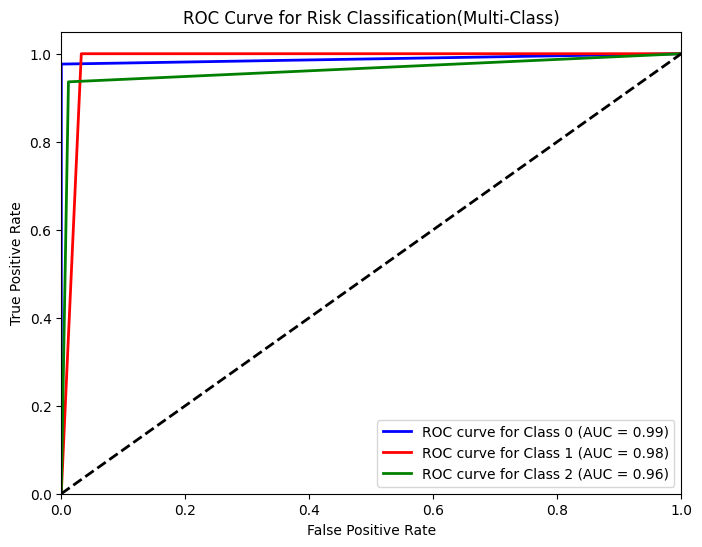

In [89]:
# Compute ROC curve and ROC AUC for each class
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multi-class ROC
# In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

n_classes = y_test_bin.shape[1]
# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Risk Classification(Multi-Class)')
plt.legend(loc="lower right")
plt.show()